In [1]:
#import the required libraries for data analysis
import pandas as pd, numpy as np, glob

In [2]:
#combining the csv files for the various months
path = "C:\\Users\\nikso\\Sales_Data\\*.csv"
files = glob.glob(path)

In [85]:
files

['C:\\Users\\nikso\\Sales_Data\\Sales_April_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_August_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_December_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_February_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_January_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_July_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_June_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_March_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_May_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_November_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_October_2019.csv',
 'C:\\Users\\nikso\\Sales_Data\\Sales_September_2019.csv']

In [3]:
#bringing the files into pandas as a dataframe  by iterating
df_list=[]
for file in files:
    df= pd.read_csv(file)
    df_list.append(df)
    

In [88]:
df_list[0].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#combining all dataframes into one for ease of analysis
df=pd.concat(df_list,ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Cleaning the data

In [6]:
#checking for null value
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

With the amount of null values being negligible, we can eliminate them from the dataframe

In [7]:
df.dropna(inplace=True)

In [8]:
#confirm result of dropping null values
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Checking for wrong values

In [9]:
## Order ID is the unique identifier and would have a wide ramge of values. It can be skipped for now.

In [10]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [11]:
df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [12]:
## the quantity ordered column should contain only integers, we have to eliminate 'Quantity Ordered'

In [13]:
df[df["Quantity Ordered"]=="Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


As can be seen above, there are 355 rows that repeat the column headers within the dataset. These rows should be eliminated.

In [14]:
df.drop(df[df["Quantity Ordered"]=="Quantity Ordered"].index,inplace=True)

In [15]:
#confirmation 
df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [16]:
#Price Each Column
df["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [17]:
## the address column would also contain a large array of unique values and can be ignored

### Duplicate values

In [96]:
df[df.duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston
1301,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",150.00,April,Seattle
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",150.00,April,Seattle
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",11.95,April,San Francisco
...,...,...,...,...,...,...,...,...,...
186508,259035,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016",149.99,September,San Francisco
186781,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",150.00,September,Dallas
186782,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",150.00,September,Dallas
186784,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",14.95,September,Boston


In [100]:
df.drop_duplicates(inplace=True)

In [19]:
# rows are considered duplicated only if the values in each column are repeated exactly

### Wrong formats

In [20]:
## ensure the order dates all have the same format

In [21]:
 df["Order Date"]=pd.to_datetime(df["Order Date"])

In [22]:
##Changing data types of columns
df=df.astype({"Quantity Ordered":int,"Price Each":float})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#### months with the highest and lowest sales

In [24]:
#get a sales column
df["Sales"]=df["Quantity Ordered"]*df["Price Each"]

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [26]:
#create the month column
df["Month"]=df["Order Date"].dt.month_name()

In [27]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,September
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,September
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,September
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,September


In [28]:
df.groupby("Month")["Sales"].sum().sort_values()

Month
January      1.822257e+06
September    2.097560e+06
February     2.202022e+06
August       2.244468e+06
June         2.577802e+06
July         2.647776e+06
March        2.807100e+06
May          3.152607e+06
November     3.199603e+06
April        3.390670e+06
October      3.736727e+06
December     4.613443e+06
Name: Sales, dtype: float64

 *the month with lowest sales is january, while the highest sales occurred in December*

### Average monthly Sales per City

In [29]:
##insert a ciolumn for the city
df["City"]=df["Purchase Address"].str.split(", ",expand=True)[1]

In [30]:
df["City"]

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: City, Length: 185950, dtype: object

In [31]:
## Put the average monthly sales for each city in a dictionary
Cities={}
for city in df["City"].unique():
    df1=df[df["City"]==city]
    mean_sales=df1.groupby("Month")["Sales"].mean()
    Cities.update({city:mean_sales})

In [101]:
Cities["Dallas"]

Month
April        186.330971
August       185.706054
December     189.695491
February     189.703242
January      182.987895
July         192.672568
June         175.809737
March        185.159600
May          188.920823
November     181.732135
October      197.154118
September    175.816767
Name: Sales, dtype: float64

### Highest selling product per month

In [33]:
df.groupby(["Month","Product"])["Sales"].sum()

Month      Product               
April      20in Monitor               43226.07
           27in 4K Gaming Monitor    220734.34
           27in FHD Monitor          110392.64
           34in Ultrawide Monitor    248513.46
           AA Batteries (4-pack)      10832.64
                                       ...    
September  ThinkPad Laptop           248997.51
           USB-C Charging Cable       19048.30
           Vareebadd Phone            50400.00
           Wired Headphones           15598.99
           iPhone                    277900.00
Name: Sales, Length: 228, dtype: float64

In [45]:
hsp={}
for month in df["Month"].unique():
    df1=df[df["Month"]==month]
    max_sales=df1.groupby("Product")["Sales"].sum().max()
    max_indx=df1.groupby("Product")["Sales"].sum().idxmax()
    hsp.update({month:[max_indx,max_sales]})

In [106]:
df[df["Month"]=="July"].groupby("Product")["Sales"].sum().idxmax()

'Macbook Pro Laptop'

In [109]:
#checking the result for a random month
hsp["June"]

['Macbook Pro Laptop', 605200.0]

In [ ]:
i=1

x= Months
y=

### Overall Highest Selling Product

There are two possible ways to respond to this question:
    * highest selling product by sales
    * highest selling product by quantity ordered

In [48]:
#Find the sum of the sales for each product, then the pick the one with highest value
df.groupby("Product")["Sales"].sum().idxmax()

'Macbook Pro Laptop'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

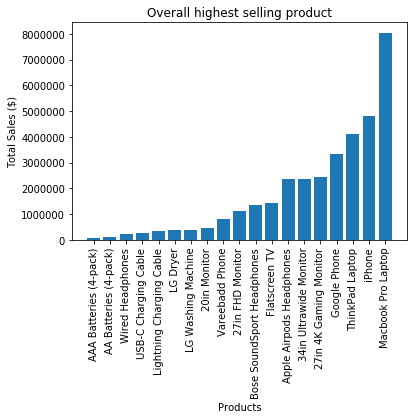

In [58]:
y=df.groupby("Product")["Sales"].sum().sort_values()
x=df.groupby("Product")["Sales"].sum().sort_values().index
#plot the chart
plt.bar(x,y)

#set the chart title
plt.title("Overall highest selling product")

#axis labeling x and y
plt.xlabel("Products")
plt.ylabel("Total Sales ($)")

plt.xticks(rotation=90)

#### Highest selling product by quantity

In [60]:
df.groupby("Product")["Quantity Ordered"].sum().sort_values().idxmax()

'AAA Batteries (4-pack)'

### 7. The most profitable Product

The profit can be calculated if we have the cost price of each product. Since that is not available, we can make use of the selling price and find the product with the highest sales.

In [61]:
df.groupby("Product")["Sales"].sum().idxmax()

'Macbook Pro Laptop'

### 8. Products with the highest frequency of being bought together

Products that are bought together would have the same Order ID. Start by identifying all producst that share order IDs.

In [65]:
df=df.astype({"Order ID": int})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Sales             185950 non-null  float64       
 7   Month             185950 non-null  object        
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 12.8+ MB


In [84]:
#create a dataframe of all rows with same order ID
df[df.duplicated("Order ID",keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,September,Atlanta
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,September,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,September,Atlanta
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,September,San Francisco


In [79]:
#merge all products with same order ID into one row
Freq=df[df.duplicated("Order ID",keep=False)].groupby("Order ID")["Product"].agg(",".join).reset_index()

In [80]:
Freq

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [83]:
Freq.groupby("Product").count().idxmax()

Order ID    iPhone,Lightning Charging Cable
dtype: object